Dataset baixado para: /root/.cache/kagglehub/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/versions/5
Arquivos disponíveis:
 - Readme.txt
 - Edge_IIoTset__DatasetFL.pdf
 - Edge-IIoTset dataset

Procurando em diretório: Edge-IIoTset dataset
 - Encontrado: /root/.cache/kagglehub/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/versions/5/Edge-IIoTset dataset/Normal traffic/Distance/Distance.csv
 - Encontrado: /root/.cache/kagglehub/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/versions/5/Edge-IIoTset dataset/Normal traffic/Temperature_and_Humidity/Temperature_and_Humidity.csv
 - Encontrado: /root/.cache/kagglehub/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/versions/5/Edge-IIoTset dataset/Normal traffic/Flame_Sensor/Flame_Sensor.csv
 - Encontrado: /root/.cache/kagglehub/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/versions/5/Edge-IIoTset dataset/

<ipython-input-2-cb334ef0445f>:83: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(main_csv[0])



Dataset carregado: /root/.cache/kagglehub/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/versions/5/Edge-IIoTset dataset/Normal traffic/Distance/Distance.csv

===== CARACTERÍSTICAS GERAIS DO DATASET =====
Total de Registros: 1143540
Total de Features: 63
Tipos de Variáveis:
 - Numéricas: 47
 - Categóricas: 16
 - Binárias: 10

===== DISTRIBUIÇÃO DAS CLASSES =====

Distribuição para a coluna: Attack_label
 - 0: 1143540 (100.00%)


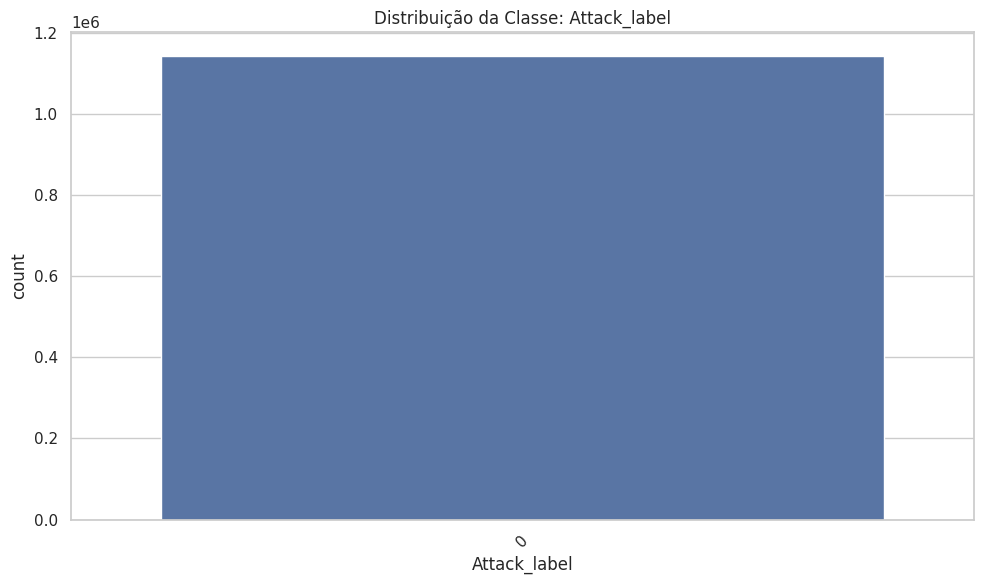


Distribuição para a coluna: Attack_type
 - Normal: 1143540 (100.00%)


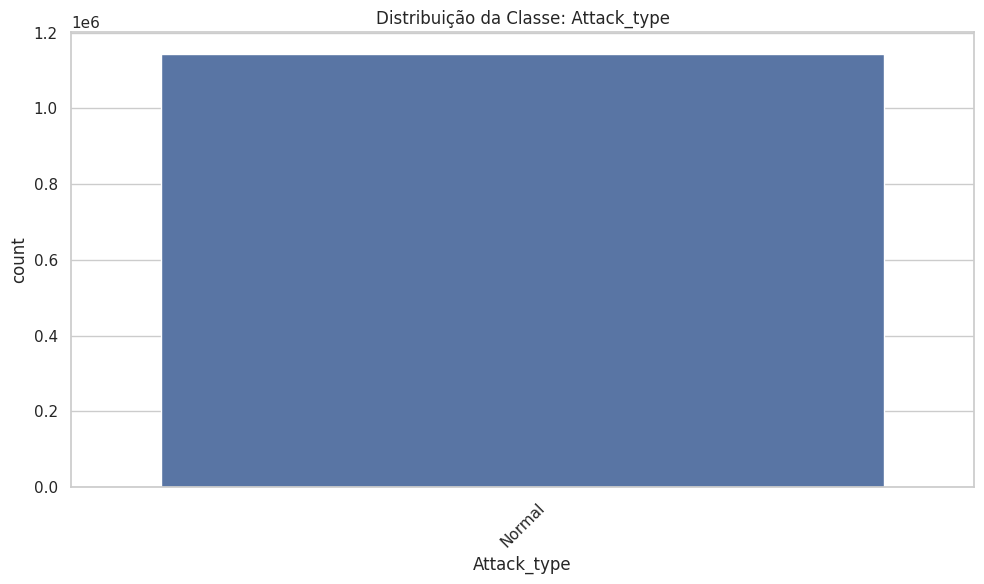


===== RESUMO ESTATÍSTICO DAS FEATURES NUMÉRICAS =====
                               count          mean           std  min          25%           50%           75%           max
arp.opcode                 1143540.0  5.159417e-05  7.422228e-03  0.0          0.0  0.000000e+00  0.000000e+00  2.000000e+00
arp.hw.size                1143540.0  2.990713e-04  4.235965e-02  0.0          0.0  0.000000e+00  0.000000e+00  6.000000e+00
icmp.checksum              1143540.0  0.000000e+00  0.000000e+00  0.0          0.0  0.000000e+00  0.000000e+00  0.000000e+00
icmp.seq_le                1143540.0  0.000000e+00  0.000000e+00  0.0          0.0  0.000000e+00  0.000000e+00  0.000000e+00
icmp.transmit_timestamp    1143540.0  0.000000e+00  0.000000e+00  0.0          0.0  0.000000e+00  0.000000e+00  0.000000e+00
icmp.unused                1143540.0  0.000000e+00  0.000000e+00  0.0          0.0  0.000000e+00  0.000000e+00  0.000000e+00
http.file_data             1143540.0  0.000000e+00  0.000000e+00  0.0 

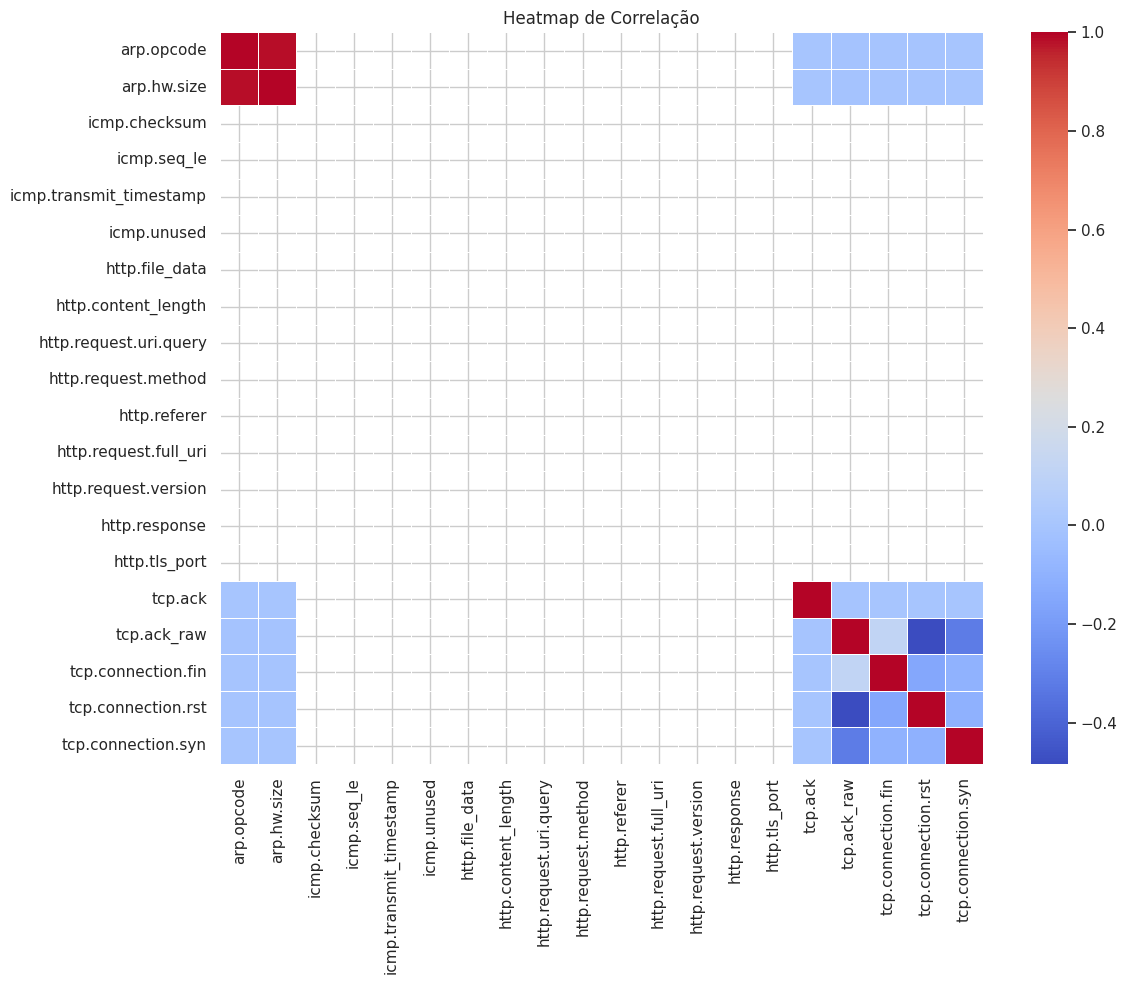


===== ANÁLISE DE OUTLIERS =====


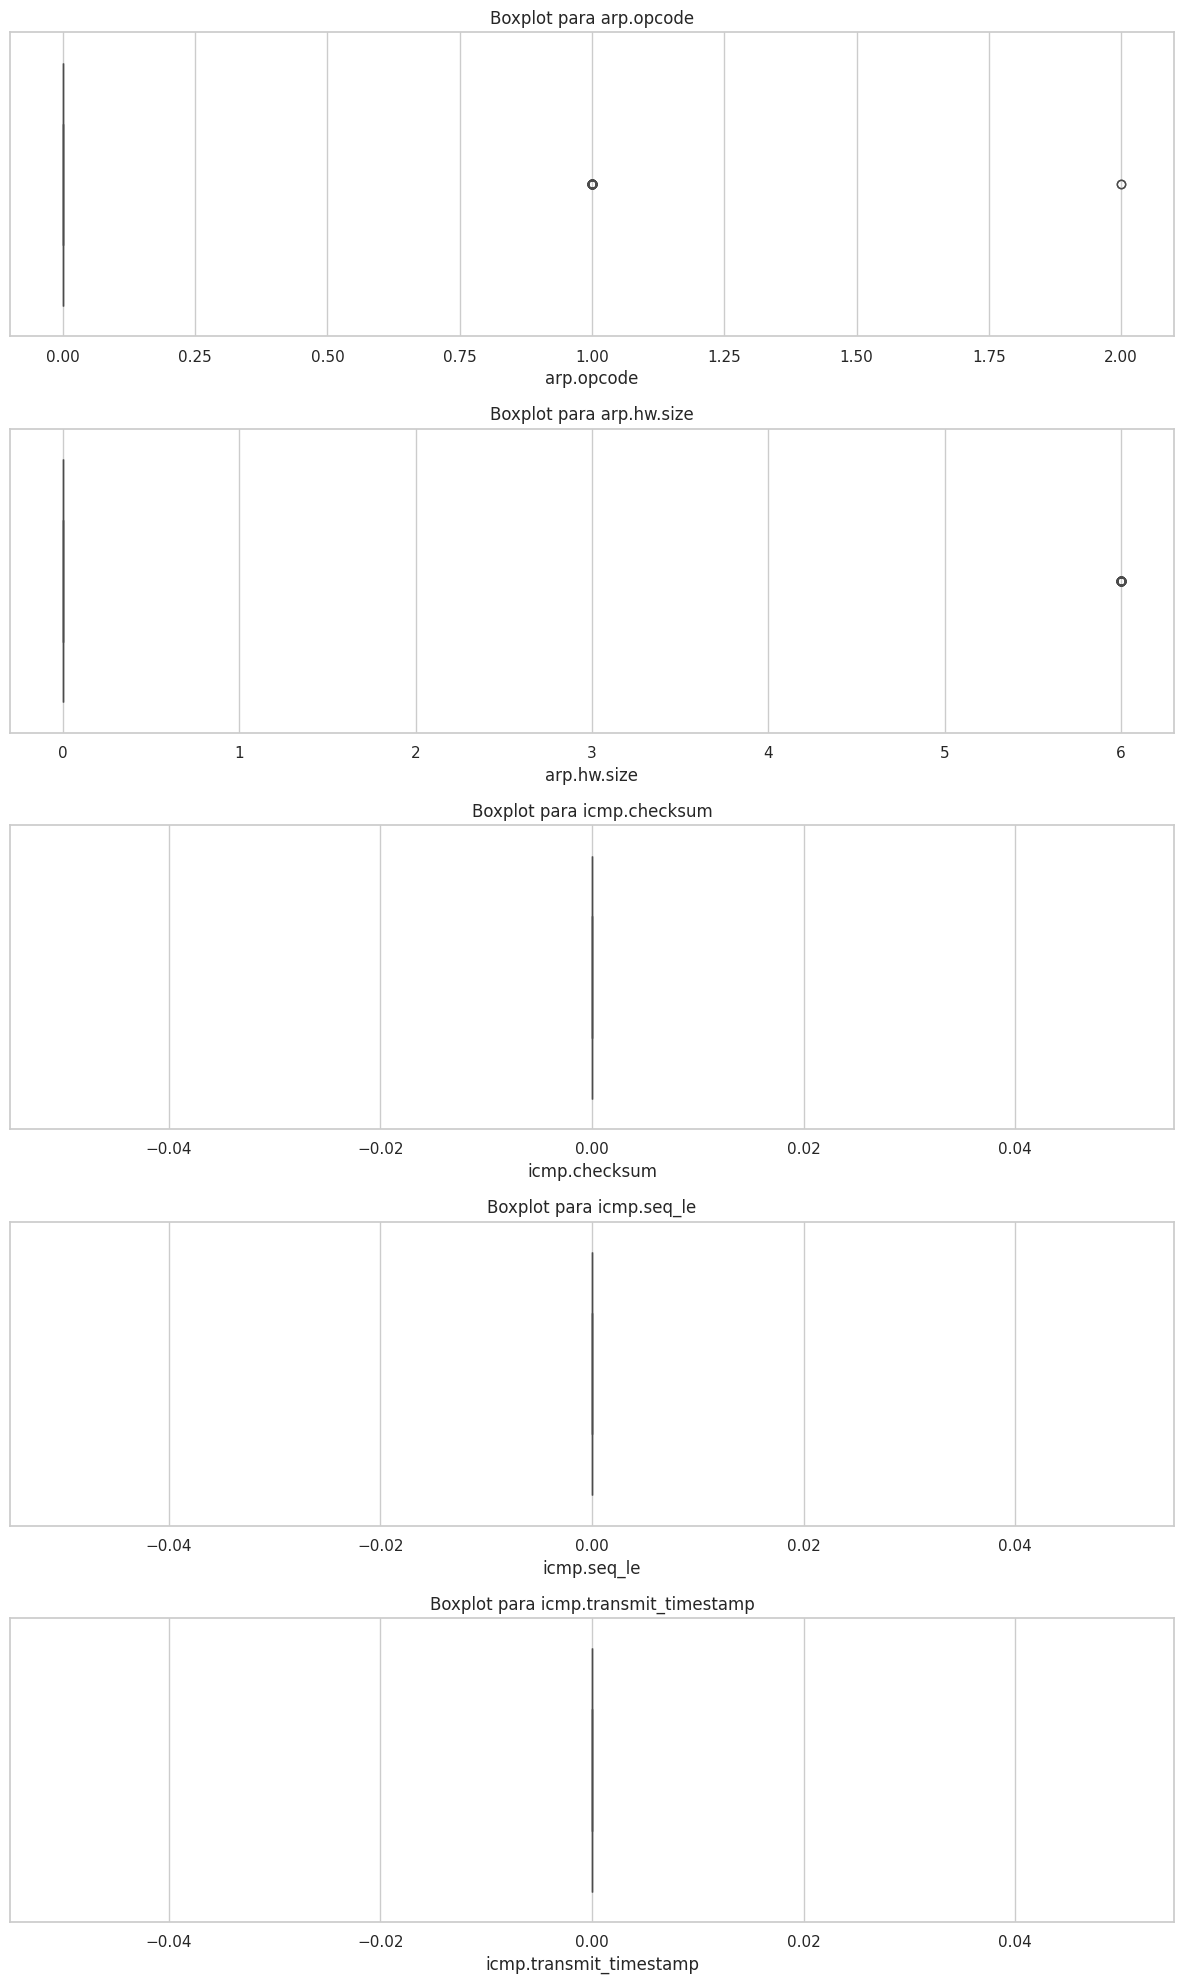


===== ANÁLISE DE VALORES AUSENTES =====
Empty DataFrame
Columns: [Valores Ausentes, Porcentagem (%)]
Index: []
Não há valores ausentes no dataset.

Análise estatística geral concluída. Resultados salvos para uso em outros notebooks.


In [ ]:
# Notebook 1: Análise Estatística Geral do Dataset Edge-IIoTset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from zipfile import ZipFile
import json

# Configurações para exibição de dados
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Download do dataset
path = kagglehub.dataset_download("mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot")
print(f"Dataset baixado para: {path}")

# Verificar os arquivos no diretório
files = os.listdir(path)
print("Arquivos disponíveis:")
for file in files:
    print(f" - {file}")

# Função para listar conteúdo do arquivo ZIP
def list_zip_contents(zip_path):
    with ZipFile(zip_path, 'r') as zip_ref:
        return zip_ref.namelist()

# Extrair os arquivos CSV
csv_files = []

# Primeiro verificamos arquivos zip
for file in files:
    if file.endswith('.zip'):
        zip_path = os.path.join(path, file)
        contents = list_zip_contents(zip_path)
        print(f"\nConteúdo de {file}:")
        for item in contents:
            print(f" - {item}")
            if item.endswith('.csv'):
                # Extrair apenas os arquivos CSV
                with ZipFile(zip_path, 'r') as zip_ref:
                    zip_ref.extract(item, path)
                    csv_files.append(os.path.join(path, item))

# Agora verificamos diretórios
for file in files:
    file_path = os.path.join(path, file)
    if os.path.isdir(file_path):
        print(f"\nProcurando em diretório: {file}")
        for root, dirs, dir_files in os.walk(file_path):
            for dir_file in dir_files:
                if dir_file.endswith('.csv'):
                    csv_path = os.path.join(root, dir_file)
                    print(f" - Encontrado: {csv_path}")
                    csv_files.append(csv_path)
                elif dir_file.endswith('.zip'):
                    # Caso encontre zips dentro do diretório
                    zip_path = os.path.join(root, dir_file)
                    print(f" - Encontrado zip: {zip_path}")
                    try:
                        contents = list_zip_contents(zip_path)
                        for item in contents:
                            if item.endswith('.csv'):
                                with ZipFile(zip_path, 'r') as zip_ref:
                                    zip_ref.extract(item, path)
                                    csv_files.append(os.path.join(path, item))
                                    print(f"   - Extraído: {item}")
                    except:
                        print(f"   - Não foi possível abrir o arquivo zip: {zip_path}")

print(f"\nArquivos CSV encontrados: {len(csv_files)}")
for csv in csv_files:
    print(f" - {csv}")

# Carregar o dataset principal
# Nota: Ajuste o nome do arquivo conforme necessário após a extração
main_csv = [csv for csv in csv_files if 'edge' in csv.lower() or 'iiot' in csv.lower()]
if main_csv:
    df = pd.read_csv(main_csv[0])
    print(f"\nDataset carregado: {main_csv[0]}")
else:
    # Usar o primeiro CSV disponível se não encontrar um nome específico
    df = pd.read_csv(csv_files[0])
    print(f"\nDataset carregado: {csv_files[0]}")

# Características Gerais do Dataset
print("\n===== CARACTERÍSTICAS GERAIS DO DATASET =====")
total_registros = len(df)
total_features = len(df.columns)

# Identificar tipos de variáveis
tipos_variaveis = df.dtypes.value_counts()
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# Identificar variáveis binárias (0/1 ou True/False)
bin_features = []
for col in num_features:
    if df[col].nunique() == 2:
        bin_features.append(col)

print(f"Total de Registros: {total_registros}")
print(f"Total de Features: {total_features}")
print(f"Tipos de Variáveis:")
print(f" - Numéricas: {len(num_features)}")
print(f" - Categóricas: {len(cat_features)}")
print(f" - Binárias: {len(bin_features)}")

# Verificar se há coluna de classe/ataque
class_columns = [col for col in df.columns if 'class' in col.lower() or 'label' in col.lower() or 'attack' in col.lower()]

if class_columns:
    print("\n===== DISTRIBUIÇÃO DAS CLASSES =====")
    for col in class_columns:
        print(f"\nDistribuição para a coluna: {col}")
        classe_counts = df[col].value_counts()
        classe_perc = df[col].value_counts(normalize=True) * 100

        for valor, count in classe_counts.items():
            print(f" - {valor}: {count} ({classe_perc[valor]:.2f}%)")

        # Visualizar a distribuição das classes
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df)
        plt.title(f'Distribuição da Classe: {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("\nNão foi encontrada coluna específica para classes/ataques.")

# Resumo estatístico das features numéricas
print("\n===== RESUMO ESTATÍSTICO DAS FEATURES NUMÉRICAS =====")
print(df[num_features].describe().T)

# Visualização da matriz de correlação
print("\n===== CORRELAÇÃO ENTRE FEATURES =====")
# Selecionar apenas as primeiras 20 colunas numéricas para melhor visualização
if len(num_features) > 20:
    correlation_features = num_features[:20]
    print(f"Exibindo correlação para as primeiras 20 features numéricas de {len(num_features)}")
else:
    correlation_features = num_features

correlation_matrix = df[correlation_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlação')
plt.tight_layout()
plt.show()

# Análise de Outliers (para as primeiras 5 features numéricas)
print("\n===== ANÁLISE DE OUTLIERS =====")
outlier_features = num_features[:5]  # Limitar para as primeiras 5 features
fig, axes = plt.subplots(len(outlier_features), 1, figsize=(12, 4*len(outlier_features)))

for i, feature in enumerate(outlier_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot para {feature}')

plt.tight_layout()
plt.show()

# Identificação de valores ausentes
print("\n===== ANÁLISE DE VALORES AUSENTES =====")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Ausentes': missing_values,
    'Porcentagem (%)': missing_percent
})

print(missing_df[missing_df['Valores Ausentes'] > 0])

if missing_df['Valores Ausentes'].sum() == 0:
    print("Não há valores ausentes no dataset.")

# Salvar resultados em um arquivo JSON para uso em outros notebooks
resultados = {
    "total_registros": total_registros,
    "total_features": total_features,
    "num_features": len(num_features),
    "cat_features": len(cat_features),
    "bin_features": len(bin_features),
    "features_numericas": num_features,
    "features_categoricas": cat_features,
    "features_binarias": bin_features,
    "path_dataset": path,
    "arquivos_csv": csv_files
}

with open(os.path.join(path, 'analise_estatistica_resultados.json'), 'w') as f:
    json.dump(resultados, f)

print("\nAnálise estatística geral concluída. Resultados salvos para uso em outros notebooks.")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from zipfile import ZipFile
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Função para criar o relatório completo
def generate_full_report(df, path, csv_files):
    # Diretório para imagens (dentro da raiz do projeto)
    img_dir = os.path.join(os.getcwd(), 'images')
    if not os.path.exists(img_dir):
        os.makedirs(img_dir)

    # Lista para armazenar todas as seções do relatório
    report_sections = []

    # 1. Cabeçalho do relatório
    header = f"""# Relatório de Análise Estatística do Dataset Edge-IIoTset
*Gerado em: {datetime.now().strftime('%d-%m-%Y %H:%M:%S')}*

## 1. Introdução

Este relatório apresenta uma análise estatística detalhada do dataset Edge-IIoTset, que contém dados relacionados à segurança cibernética em ambientes de IoT (Internet das Coisas) e IIoT (Internet das Coisas Industrial). A análise foi conduzida utilizando Python com as bibliotecas pandas, numpy, matplotlib e seaborn.
"""
    report_sections.append(header)

    # 2. Aquisição e Preparação dos Dados
    data_acquisition = f"""
## 2. Aquisição e Preparação dos Dados

### 2.1 Fonte dos Dados
O dataset foi obtido do Kaggle, especificamente do conjunto "mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot".

### 2.2 Processo de Extração
- Os arquivos foram baixados utilizando a biblioteca `kagglehub`
- Foi realizada uma verificação recursiva de arquivos CSV em {len(csv_files)} arquivos, tanto em arquivos ZIP quanto em diretórios
- Os arquivos CSV encontrados foram:
"""

    # Adicionar lista de arquivos CSV (limitada a 5 para não sobrecarregar o relatório)
    for i, csv in enumerate(csv_files[:5]):
        data_acquisition += f"  - {os.path.basename(csv)}\n"
    if len(csv_files) > 5:
        data_acquisition += f"  - ... e mais {len(csv_files) - 5} arquivos\n"

    report_sections.append(data_acquisition)

    # 3. Características Gerais do Dataset
    # Identificar tipos de variáveis
    num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_features = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

    # Identificar variáveis binárias (0/1 ou True/False)
    bin_features = []
    for col in num_features:
        if df[col].nunique() == 2:
            bin_features.append(col)

    general_characteristics = f"""
## 3. Características Gerais do Dataset

### 3.1 Dimensões
- **Total de Registros**: {len(df):,}
- **Total de Features**: {len(df.columns)}

### 3.2 Tipos de Variáveis
- **Variáveis Numéricas**: {len(num_features)}
- **Variáveis Categóricas**: {len(cat_features)}
- **Variáveis Binárias**: {len(bin_features)}

#### Exemplo de Variáveis por Tipo:
"""

    # Adicionar exemplos de cada tipo de variável
    if num_features:
        general_characteristics += "**Numéricas**: " + ", ".join(num_features[:5])
        if len(num_features) > 5:
            general_characteristics += f" e mais {len(num_features) - 5}"
        general_characteristics += "\n\n"

    if cat_features:
        general_characteristics += "**Categóricas**: " + ", ".join(cat_features[:5])
        if len(cat_features) > 5:
            general_characteristics += f" e mais {len(cat_features) - 5}"
        general_characteristics += "\n\n"

    if bin_features:
        general_characteristics += "**Binárias**: " + ", ".join(bin_features[:5])
        if len(bin_features) > 5:
            general_characteristics += f" e mais {len(bin_features) - 5}"
        general_characteristics += "\n"

    report_sections.append(general_characteristics)

    # 4. Análise de Classes/Ataques
    class_columns = [col for col in df.columns if 'class' in col.lower() or 'label' in col.lower() or 'attack' in col.lower()]

    class_analysis = """
## 4. Análise de Classes/Ataques
"""

    if class_columns:
        class_analysis += "### 4.1 Distribuição das Classes\n"

        for col in class_columns:
            class_analysis += f"\n#### Classe: {col}\n"

            # Calcular distribuição
            classe_counts = df[col].value_counts()
            classe_perc = df[col].value_counts(normalize=True) * 100

            # Adicionar tabela de distribuição
            class_analysis += "| Valor | Contagem | Percentual |\n"
            class_analysis += "|-------|----------|------------|\n"

            for valor, count in classe_counts.items():
                class_analysis += f"| {valor} | {count:,} | {classe_perc[valor]:.2f}% |\n"

            # Criar e salvar visualização
            plt.figure(figsize=(10, 6))
            ax = sns.countplot(x=col, data=df)
            plt.title(f'Distribuição da Classe: {col}')
            plt.xticks(rotation=45)

            # Adicionar valores nas barras
            for p in ax.patches:
                ax.annotate(f'{int(p.get_height()):,}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha = 'center', va = 'bottom',
                            xytext = (0, 5), textcoords = 'offset points')

            plt.tight_layout()
            img_path = os.path.join(img_dir, f'class_distribution_{col}.png')
            plt.savefig(img_path)
            plt.close()

            # Referenciar a imagem no relatório markdown
            class_analysis += f"\n![Distribuição da Classe {col}](images/class_distribution_{col}.png)\n"

            # Análise de desbalanceamento
            if len(classe_counts) > 1:
                max_class = classe_counts.idxmax()
                min_class = classe_counts.idxmin()
                ratio = classe_counts[max_class] / classe_counts[min_class]

                if ratio > 10:
                    class_analysis += f"\n**Observação**: O dataset está extremamente desbalanceado para esta classe. A classe majoritária ({max_class}) é {ratio:.1f} vezes mais frequente que a classe minoritária ({min_class}).\n"
                elif ratio > 3:
                    class_analysis += f"\n**Observação**: O dataset apresenta desbalanceamento moderado. A classe majoritária ({max_class}) é {ratio:.1f} vezes mais frequente que a classe minoritária ({min_class}).\n"
                else:
                    class_analysis += f"\n**Observação**: O dataset está relativamente balanceado para esta classe, com uma proporção de {ratio:.1f} entre a classe mais frequente e a menos frequente.\n"
    else:
        class_analysis += """
Não foram encontradas colunas específicas que indicam classes ou tipos de ataques no dataset.
As colunas de classes geralmente têm nomes contendo termos como 'class', 'label', ou 'attack'.

Recomendação: Verificar a documentação do dataset para identificar qual coluna representa os tipos de ataques ou classes.
"""

    report_sections.append(class_analysis)

    # 5. Análise Estatística das Features Numéricas
    numeric_analysis = """
## 5. Análise Estatística das Features Numéricas

### 5.1 Estatísticas Descritivas
"""

    # Selecionar apenas algumas features numéricas para não sobrecarregar o relatório
    selected_num_features = num_features[:10]

    # Calcular estatísticas descritivas
    desc_stats = df[selected_num_features].describe().T

    # Formatar tabela de estatísticas
    numeric_analysis += "| Feature | Contagem | Média | Desvio Padrão | Mínimo | 25% | 50% (Mediana) | 75% | Máximo |\n"
    numeric_analysis += "|---------|----------|-------|---------------|--------|-----|--------------|-----|--------|\n"

    for feature, row in desc_stats.iterrows():
        numeric_analysis += f"| {feature} | {row['count']:,.0f} | {row['mean']:,.2f} | {row['std']:,.2f} | {row['min']:,.2f} | {row['25%']:,.2f} | {row['50%']:,.2f} | {row['75%']:,.2f} | {row['max']:,.2f} |\n"

    if len(num_features) > 10:
        numeric_analysis += f"\n*Nota: Apenas as 10 primeiras features numéricas são exibidas de um total de {len(num_features)}.*\n"

    # 5.2 Correlação entre Features
    numeric_analysis += "\n### 5.2 Correlação entre Features\n"

    # Selecionar features para análise de correlação (limitado para melhor visualização)
    if len(num_features) > 15:
        correlation_features = num_features[:15]
    else:
        correlation_features = num_features

    # Calcular e visualizar a matriz de correlação
    correlation_matrix = df[correlation_features].corr()

    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                annot=False, square=True, linewidths=.5)
    plt.title('Heatmap de Correlação')
    plt.tight_layout()
    img_path = os.path.join(img_dir, 'correlation_heatmap.png')
    plt.savefig(img_path)
    plt.close()

    numeric_analysis += f"\n![Matriz de Correlação](images/correlation_heatmap.png)\n"

    # Identificar correlações mais fortes (positivas e negativas)
    corr_pairs = []
    for i in range(len(correlation_features)):
        for j in range(i+1, len(correlation_features)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Threshold para correlações fortes
                corr_pairs.append((correlation_features[i], correlation_features[j], correlation_matrix.iloc[i, j]))

    if corr_pairs:
        # Ordenar por valor absoluto de correlação
        corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

        numeric_analysis += "\n#### Correlações Significativas Identificadas:\n"
        numeric_analysis += "| Feature 1 | Feature 2 | Correlação |\n"
        numeric_analysis += "|-----------|-----------|------------|\n"

        for f1, f2, corr in corr_pairs[:10]:  # Mostrar apenas as 10 correlações mais fortes
            numeric_analysis += f"| {f1} | {f2} | {corr:.4f} |\n"

        if len(corr_pairs) > 10:
            numeric_analysis += f"\n*Nota: Exibindo apenas as 10 correlações mais fortes de um total de {len(corr_pairs)} correlações significativas.*\n"
    else:
        numeric_analysis += "\nNão foram identificadas correlações fortes (>0.7 ou <-0.7) entre as features analisadas.\n"

    report_sections.append(numeric_analysis)

    # 6. Análise de Outliers
    outlier_analysis = """
## 6. Análise de Outliers
"""

    # Selecionar algumas features numéricas para análise de outliers
    outlier_features = num_features[:5]

    for feature in outlier_features:
        # Estatísticas para detectar outliers
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        outlier_percentage = (len(outliers) / len(df)) * 100

        # Criar visualização de boxplot
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[feature])
        plt.title(f'Boxplot para {feature}')
        plt.tight_layout()
        img_path = os.path.join(img_dir, f'boxplot_{feature}.png')
        plt.savefig(img_path)
        plt.close()

        # Adicionar análise ao relatório
        outlier_analysis += f"\n### Feature: {feature}\n"
        outlier_analysis += f"- **Outliers detectados**: {len(outliers):,} ({outlier_percentage:.2f}% dos registros)\n"
        outlier_analysis += f"- **Limite inferior**: {lower_bound:.2f}\n"
        outlier_analysis += f"- **Limite superior**: {upper_bound:.2f}\n"

        if len(outliers) > 0:
            outlier_analysis += f"- **Valor mínimo de outlier**: {outliers.min():.2f}\n"
            outlier_analysis += f"- **Valor máximo de outlier**: {outliers.max():.2f}\n"

        outlier_analysis += f"\n![Boxplot para {feature}](images/boxplot_{feature}.png)\n"

    report_sections.append(outlier_analysis)

    # 7. Análise de Valores Ausentes
    missing_analysis = """
## 7. Análise de Valores Ausentes
"""

    # Calcular valores ausentes
    missing_values = df.isnull().sum()
    missing_percent = (df.isnull().sum() / len(df)) * 100

    missing_df = pd.DataFrame({
        'Valores Ausentes': missing_values,
        'Porcentagem (%)': missing_percent
    })

    missing_columns = missing_df[missing_df['Valores Ausentes'] > 0]

    if len(missing_columns) > 0:
        missing_analysis += "\n| Feature | Valores Ausentes | Porcentagem (%) |\n"
        missing_analysis += "|---------|------------------|----------------|\n"

        for feature, row in missing_columns.iterrows():
            missing_analysis += f"| {feature} | {row['Valores Ausentes']:,.0f} | {row['Porcentagem (%)']:.2f}% |\n"

        # Visualização de valores ausentes
        plt.figure(figsize=(12, 6))
        missing_columns = missing_columns.sort_values('Valores Ausentes', ascending=False)
        sns.barplot(x=missing_columns.index, y='Porcentagem (%)', data=missing_columns)
        plt.title('Porcentagem de Valores Ausentes por Feature')
        plt.xticks(rotation=90)
        plt.tight_layout()
        img_path = os.path.join(img_dir, 'missing_values.png')
        plt.savefig(img_path)
        plt.close()

        missing_analysis += f"\n![Valores Ausentes](images/missing_values.png)\n"

        # Adicionar recomendações para tratamento
        missing_analysis += """
### Recomendações para Tratamento de Valores Ausentes:

1. **Para features com baixa porcentagem de valores ausentes (<5%)**:
   - Considerar a remoção dos registros com valores ausentes
   - Alternativamente, imputar com a média/mediana (para variáveis numéricas) ou moda (para variáveis categóricas)

2. **Para features com alta porcentagem de valores ausentes (>20%)**:
   - Avaliar a relevância da feature para o modelo
   - Considerar a exclusão da feature se não for crítica para a análise

3. **Para features intermediárias (5-20% de valores ausentes)**:
   - Utilizar técnicas mais avançadas de imputação, como KNN ou algoritmos baseados em árvores
   - Considerar a criação de uma feature binária adicional para indicar quais valores foram imputados
"""
    else:
        missing_analysis += "\nNão foram encontrados valores ausentes no dataset analisado.\n"

    report_sections.append(missing_analysis)

    # 8. Conclusões e Próximos Passos
    conclusions = """
## 8. Conclusões e Próximos Passos

### 8.1 Principais Conclusões
"""

    # Gerar conclusões com base na análise
    conclusions += "- O dataset Edge-IIoTset contém dados relacionados à segurança cibernética em ambientes IoT e IIoT\n"
    conclusions += f"- Foram analisados {len(df):,} registros com {len(df.columns)} features\n"

    if class_columns:
        conclusions += f"- Foram identificadas {len(class_columns)} colunas de classe/tipo de ataque\n"

        # Verificar desbalanceamento
        imbalanced_classes = []
        for col in class_columns:
            classe_counts = df[col].value_counts()
            if len(classe_counts) > 1:
                max_class = classe_counts.idxmax()
                min_class = classe_counts.idxmin()
                ratio = classe_counts[max_class] / classe_counts[min_class]
                if ratio > 3:
                    imbalanced_classes.append(col)

        if imbalanced_classes:
            conclusions += f"- Foram identificadas classes desbalanceadas: {', '.join(imbalanced_classes)}\n"

    # Verificar outliers
    outlier_features_significant = []
    for feature in outlier_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[feature] < Q1 - 1.5 * IQR) | (df[feature] > Q3 + 1.5 * IQR)][feature]
        if (len(outliers) / len(df)) > 0.05:  # Se mais de 5% são outliers
            outlier_features_significant.append(feature)

    if outlier_features_significant:
        conclusions += f"- Presença significativa de outliers nas features: {', '.join(outlier_features_significant)}\n"

    # Verificar correlações
    if len(corr_pairs) > 0:
        conclusions += f"- Foram identificadas {len(corr_pairs)} correlações fortes entre features\n"

    # Verificar valores ausentes
    if len(missing_columns) > 0:
        conclusions += f"- {len(missing_columns)} features apresentam valores ausentes\n"
    else:
        conclusions += "- O dataset não apresenta valores ausentes\n"

    conclusions += """
### 8.2 Recomendações para Análises Futuras

- **Pré-processamento de Dados**:
  - Tratar valores ausentes conforme recomendado na seção 7
  - Normalizar ou padronizar features numéricas para melhorar desempenho de algoritmos
  - Tratar outliers através de técnicas como winsorização ou transformações logarítmicas

- **Engenharia de Features**:
  - Investigar possíveis combinações ou transformações de features existentes
  - Reduzir dimensionalidade através de PCA ou seleção de features para melhorar desempenho

- **Modelagem**:
"""

    if class_columns and any(imbalanced_classes):
        conclusions += """
  - Utilizar técnicas para lidar com desbalanceamento de classes:
    - Oversampling (SMOTE, ADASYN)
    - Undersampling da classe majoritária
    - Conjunto de técnicas (SMOTE+ENN, SMOTE+Tomek)
    - Utilizar métricas adequadas para avaliação (F1-score, AUC-ROC)
"""

    conclusions += """
- **Avaliação e Interpretação**:
  - Aplicar validação cruzada para avaliar robustez dos modelos
  - Analisar importância de features para identificar quais são mais relevantes na detecção de ataques
  - Implementar explicabilidade (SHAP, LIME) para entender decisões dos modelos

- **Implementação em Ambientes Reais**:
  - Estabelecer pipeline de monitoramento para detectar drift nos dados
  - Avaliar desempenho computacional para implementação em dispositivos edge
"""

    report_sections.append(conclusions)

    # Juntar todas as seções do relatório
    full_report = "\n".join(report_sections)

    # Salvar o relatório em arquivo markdown na raiz do projeto
    report_path = os.path.join(os.getcwd(), 'edge_iiotset_analysis_report.md')
    with open(report_path, 'w', encoding='utf-8') as f:
        f.write(full_report)

    print(f"Relatório completo gerado em: {report_path}")
    return report_path

# Função principal para executar a análise e gerar o relatório
def main():
    print("Iniciando análise do dataset Edge-IIoTset...")

    try:
        # Download do dataset
        path = kagglehub.dataset_download("mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot")
        print(f"Dataset baixado para: {path}")

        # Verificar os arquivos no diretório
        files = os.listdir(path)
        print(f"Encontrados {len(files)} arquivos no diretório de download")

        # Função para listar conteúdo do arquivo ZIP
        def list_zip_contents(zip_path):
            with ZipFile(zip_path, 'r') as zip_ref:
                return zip_ref.namelist()

        # Extrair os arquivos CSV
        csv_files = []

        # Primeiro verificamos arquivos zip
        for file in files:
            if file.endswith('.zip'):
                zip_path = os.path.join(path, file)
                try:
                    contents = list_zip_contents(zip_path)
                    for item in contents:
                        if item.endswith('.csv'):
                            # Extrair apenas os arquivos CSV
                            with ZipFile(zip_path, 'r') as zip_ref:
                                zip_ref.extract(item, path)
                                csv_files.append(os.path.join(path, item))
                except Exception as e:
                    print(f"Erro ao processar o arquivo zip {file}: {str(e)}")

        # Agora verificamos diretórios
        for file in files:
            file_path = os.path.join(path, file)
            if os.path.isdir(file_path):
                for root, dirs, dir_files in os.walk(file_path):
                    for dir_file in dir_files:
                        if dir_file.endswith('.csv'):
                            csv_path = os.path.join(root, dir_file)
                            csv_files.append(csv_path)
                        elif dir_file.endswith('.zip'):
                            # Caso encontre zips dentro do diretório
                            zip_path = os.path.join(root, dir_file)
                            try:
                                contents = list_zip_contents(zip_path)
                                for item in contents:
                                    if item.endswith('.csv'):
                                        with ZipFile(zip_path, 'r') as zip_ref:
                                            zip_ref.extract(item, path)
                                            csv_files.append(os.path.join(path, item))
                            except:
                                print(f"Não foi possível abrir o arquivo zip: {zip_path}")

        print(f"Total de arquivos CSV encontrados: {len(csv_files)}")

        # Carregar o dataset principal
        main_csv = [csv for csv in csv_files if 'edge' in csv.lower() or 'iiot' in csv.lower()]
        if main_csv:
            df = pd.read_csv(main_csv[0])
            print(f"Dataset carregado: {main_csv[0]}")
        else:
            # Usar o primeiro CSV disponível se não encontrar um nome específico
            df = pd.read_csv(csv_files[0])
            print(f"Dataset carregado: {csv_files[0]}")

        # Gerar o relatório completo
        report_path = generate_full_report(df, path, csv_files)

        print("\nProcesso concluído com sucesso!")
        print(f"O relatório de análise está disponível em: {report_path}")

        return report_path

    except Exception as e:
        print(f"Erro durante a análise: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    main()

Iniciando análise do dataset Edge-IIoTset...
Dataset baixado para: /root/.cache/kagglehub/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/versions/5
Encontrados 5 arquivos no diretório de download
Total de arquivos CSV encontrados: 26
Dataset carregado: /root/.cache/kagglehub/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/versions/5/Edge-IIoTset dataset/Normal traffic/Distance/Distance.csv
Relatório completo gerado em: /content/edge_iiotset_analysis_report.md

Processo concluído com sucesso!
O relatório de análise está disponível em: /content/edge_iiotset_analysis_report.md


In [ ]:
report_path = os.path.join(os.getcwd(), 'edge_iiotset_analysis_report.md')

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from zipfile import ZipFile
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Função para criar o relatório de um único dataset
def generate_dataset_report(df, dataset_name, img_dir):
    """
    Gera relatório para um único dataset

    Args:
        df: DataFrame com os dados
        dataset_name: Nome do arquivo de dataset
        img_dir: Diretório para salvar imagens

    Returns:
        str: Conteúdo do relatório em markdown
    """
    # Lista para armazenar todas as seções do relatório
    report_sections = []

    # Cabeçalho do relatório
    header = f"""# Relatório de Análise Estatística: {dataset_name}
*Gerado em: {datetime.now().strftime('%d-%m-%Y %H:%M:%S')}*

## 1. Introdução

Este relatório apresenta uma análise estatística detalhada do dataset {dataset_name}, que faz parte do conjunto Edge-IIoTset relacionado à segurança cibernética em ambientes de IoT (Internet das Coisas) e IIoT (Internet das Coisas Industrial).
"""
    report_sections.append(header)

    # Características Gerais do Dataset
    # Identificar tipos de variáveis
    num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_features = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

    # Identificar variáveis binárias (0/1 ou True/False)
    bin_features = []
    for col in num_features:
        if df[col].nunique() == 2:
            bin_features.append(col)

    general_characteristics = f"""
## 2. Características Gerais do Dataset

### 2.1 Dimensões
- **Nome do Arquivo**: {dataset_name}
- **Total de Registros**: {len(df):,}
- **Total de Features**: {len(df.columns)}

### 2.2 Tipos de Variáveis
- **Variáveis Numéricas**: {len(num_features)}
- **Variáveis Categóricas**: {len(cat_features)}
- **Variáveis Binárias**: {len(bin_features)}

#### Exemplo de Variáveis por Tipo:
"""

    # Adicionar exemplos de cada tipo de variável
    if num_features:
        general_characteristics += "**Numéricas**: " + ", ".join(num_features[:5])
        if len(num_features) > 5:
            general_characteristics += f" e mais {len(num_features) - 5}"
        general_characteristics += "\n\n"

    if cat_features:
        general_characteristics += "**Categóricas**: " + ", ".join(cat_features[:5])
        if len(cat_features) > 5:
            general_characteristics += f" e mais {len(cat_features) - 5}"
        general_characteristics += "\n\n"

    if bin_features:
        general_characteristics += "**Binárias**: " + ", ".join(bin_features[:5])
        if len(bin_features) > 5:
            general_characteristics += f" e mais {len(bin_features) - 5}"
        general_characteristics += "\n"

    report_sections.append(general_characteristics)

    # Análise de Classes/Ataques
    class_columns = [col for col in df.columns if 'class' in col.lower() or 'label' in col.lower() or 'attack' in col.lower()]

    class_analysis = """
## 3. Análise de Classes/Ataques
"""

    if class_columns:
        class_analysis += "### 3.1 Distribuição das Classes\n"

        for col in class_columns:
            class_analysis += f"\n#### Classe: {col}\n"

            # Calcular distribuição
            classe_counts = df[col].value_counts()
            classe_perc = df[col].value_counts(normalize=True) * 100

            # Adicionar tabela de distribuição
            class_analysis += "| Valor | Contagem | Percentual |\n"
            class_analysis += "|-------|----------|------------|\n"

            for valor, count in classe_counts.items():
                class_analysis += f"| {valor} | {count:,} | {classe_perc[valor]:.2f}% |\n"

            # Criar e salvar visualização
            plt.figure(figsize=(10, 6))
            ax = sns.countplot(x=col, data=df)
            plt.title(f'Distribuição da Classe: {col}')
            plt.xticks(rotation=45)

            # Adicionar valores nas barras
            for p in ax.patches:
                ax.annotate(f'{int(p.get_height()):,}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha = 'center', va = 'bottom',
                            xytext = (0, 5), textcoords = 'offset points')

            plt.tight_layout()
            img_name = f'{os.path.splitext(dataset_name)[0]}_class_{col}.png'
            img_path = os.path.join(img_dir, img_name)
            plt.savefig(img_path)
            plt.close()

            # Referenciar a imagem no relatório markdown
            class_analysis += f"\n![Distribuição da Classe {col}](images/{img_name})\n"

            # Análise de desbalanceamento
            if len(classe_counts) > 1:
                max_class = classe_counts.idxmax()
                min_class = classe_counts.idxmin()
                ratio = classe_counts[max_class] / classe_counts[min_class]

                if ratio > 10:
                    class_analysis += f"\n**Observação**: O dataset está extremamente desbalanceado para esta classe. A classe majoritária ({max_class}) é {ratio:.1f} vezes mais frequente que a classe minoritária ({min_class}).\n"
                elif ratio > 3:
                    class_analysis += f"\n**Observação**: O dataset apresenta desbalanceamento moderado. A classe majoritária ({max_class}) é {ratio:.1f} vezes mais frequente que a classe minoritária ({min_class}).\n"
                else:
                    class_analysis += f"\n**Observação**: O dataset está relativamente balanceado para esta classe, com uma proporção de {ratio:.1f} entre a classe mais frequente e a menos frequente.\n"
    else:
        class_analysis += """
Não foram encontradas colunas específicas que indicam classes ou tipos de ataques no dataset.
As colunas de classes geralmente têm nomes contendo termos como 'class', 'label', ou 'attack'.
"""

    report_sections.append(class_analysis)

    # Análise Estatística das Features Numéricas
    numeric_analysis = """
## 4. Análise Estatística das Features Numéricas

### 4.1 Estatísticas Descritivas
"""

    # Selecionar apenas algumas features numéricas para não sobrecarregar o relatório
    selected_num_features = num_features[:10]

    # Calcular estatísticas descritivas
    if selected_num_features:
        desc_stats = df[selected_num_features].describe().T

        # Formatar tabela de estatísticas
        numeric_analysis += "| Feature | Contagem | Média | Desvio Padrão | Mínimo | 25% | 50% (Mediana) | 75% | Máximo |\n"
        numeric_analysis += "|---------|----------|-------|---------------|--------|-----|--------------|-----|--------|\n"

        for feature, row in desc_stats.iterrows():
            numeric_analysis += f"| {feature} | {row['count']:,.0f} | {row['mean']:,.2f} | {row['std']:,.2f} | {row['min']:,.2f} | {row['25%']:,.2f} | {row['50%']:,.2f} | {row['75%']:,.2f} | {row['max']:,.2f} |\n"

        if len(num_features) > 10:
            numeric_analysis += f"\n*Nota: Apenas as 10 primeiras features numéricas são exibidas de um total de {len(num_features)}.*\n"

        # Correlação entre Features
        if len(selected_num_features) > 1:
            numeric_analysis += "\n### 4.2 Correlação entre Features\n"

            # Calcular e visualizar a matriz de correlação
            correlation_matrix = df[selected_num_features].corr()

            plt.figure(figsize=(12, 10))
            mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
            cmap = sns.diverging_palette(230, 20, as_cmap=True)
            sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                        annot=False, square=True, linewidths=.5)
            plt.title('Heatmap de Correlação')
            plt.tight_layout()
            img_name = f'{os.path.splitext(dataset_name)[0]}_correlation.png'
            img_path = os.path.join(img_dir, img_name)
            plt.savefig(img_path)
            plt.close()

            numeric_analysis += f"\n![Matriz de Correlação](images/{img_name})\n"

            # Identificar correlações mais fortes (positivas e negativas)
            corr_pairs = []
            for i in range(len(selected_num_features)):
                for j in range(i+1, len(selected_num_features)):
                    if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Threshold para correlações fortes
                        corr_pairs.append((selected_num_features[i], selected_num_features[j], correlation_matrix.iloc[i, j]))

            if corr_pairs:
                # Ordenar por valor absoluto de correlação
                corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

                numeric_analysis += "\n#### Correlações Significativas Identificadas:\n"
                numeric_analysis += "| Feature 1 | Feature 2 | Correlação |\n"
                numeric_analysis += "|-----------|-----------|------------|\n"

                for f1, f2, corr in corr_pairs[:10]:  # Mostrar apenas as 10 correlações mais fortes
                    numeric_analysis += f"| {f1} | {f2} | {corr:.4f} |\n"

                if len(corr_pairs) > 10:
                    numeric_analysis += f"\n*Nota: Exibindo apenas as 10 correlações mais fortes de um total de {len(corr_pairs)} correlações significativas.*\n"
            else:
                numeric_analysis += "\nNão foram identificadas correlações fortes (>0.7 ou <-0.7) entre as features analisadas.\n"
    else:
        numeric_analysis += "\nNão foram encontradas features numéricas neste dataset para análise estatística.\n"

    report_sections.append(numeric_analysis)

    # Análise de Valores Ausentes
    missing_analysis = """
## 5. Análise de Valores Ausentes
"""

    # Calcular valores ausentes
    missing_values = df.isnull().sum()
    missing_percent = (df.isnull().sum() / len(df)) * 100

    missing_df = pd.DataFrame({
        'Valores Ausentes': missing_values,
        'Porcentagem (%)': missing_percent
    })

    missing_columns = missing_df[missing_df['Valores Ausentes'] > 0]

    if len(missing_columns) > 0:
        missing_analysis += "\n| Feature | Valores Ausentes | Porcentagem (%) |\n"
        missing_analysis += "|---------|------------------|----------------|\n"

        for feature, row in missing_columns.iterrows():
            missing_analysis += f"| {feature} | {row['Valores Ausentes']:,.0f} | {row['Porcentagem (%)']:.2f}% |\n"

        # Visualização de valores ausentes
        plt.figure(figsize=(12, 6))
        missing_columns = missing_columns.sort_values('Valores Ausentes', ascending=False)
        sns.barplot(x=missing_columns.index, y='Porcentagem (%)', data=missing_columns)
        plt.title('Porcentagem de Valores Ausentes por Feature')
        plt.xticks(rotation=90)
        plt.tight_layout()
        img_name = f'{os.path.splitext(dataset_name)[0]}_missing_values.png'
        img_path = os.path.join(img_dir, img_name)
        plt.savefig(img_path)
        plt.close()

        missing_analysis += f"\n![Valores Ausentes](images/{img_name})\n"

        missing_analysis += """
### Recomendações para Tratamento de Valores Ausentes:

1. **Para features com baixa porcentagem de valores ausentes (<5%)**:
   - Considerar a remoção dos registros com valores ausentes
   - Alternativamente, imputar com a média/mediana (para variáveis numéricas) ou moda (para variáveis categóricas)

2. **Para features com alta porcentagem de valores ausentes (>20%)**:
   - Avaliar a relevância da feature para o modelo
   - Considerar a exclusão da feature se não for crítica para a análise

3. **Para features intermediárias (5-20% de valores ausentes)**:
   - Utilizar técnicas mais avançadas de imputação, como KNN ou algoritmos baseados em árvores
   - Considerar a criação de uma feature binária adicional para indicar quais valores foram imputados
"""
    else:
        missing_analysis += "\nNão foram encontrados valores ausentes no dataset analisado.\n"

    report_sections.append(missing_analysis)

    # Conclusões
    conclusions = """
## 6. Conclusões

### 6.1 Resumo da Análise
"""

    # Gerar conclusões com base na análise
    conclusions += f"- O dataset contém {len(df):,} registros com {len(df.columns)} features\n"

    if class_columns:
        conclusions += f"- Foram identificadas {len(class_columns)} colunas de classe/tipo de ataque\n"

        # Verificar desbalanceamento
        imbalanced_classes = []
        for col in class_columns:
            classe_counts = df[col].value_counts()
            if len(classe_counts) > 1:
                max_class = classe_counts.idxmax()
                min_class = classe_counts.idxmin()
                ratio = classe_counts[max_class] / classe_counts[min_class]
                if ratio > 3:
                    imbalanced_classes.append(col)

        if imbalanced_classes:
            conclusions += f"- Classes desbalanceadas encontradas: {', '.join(imbalanced_classes)}\n"

    # Verificar correlações
    if 'corr_pairs' in locals() and len(corr_pairs) > 0:
        conclusions += f"- Foram identificadas {len(corr_pairs)} correlações fortes entre features\n"

    # Verificar valores ausentes
    if len(missing_columns) > 0:
        conclusions += f"- {len(missing_columns)} features apresentam valores ausentes\n"
    else:
        conclusions += "- O dataset não apresenta valores ausentes\n"

    report_sections.append(conclusions)

    # Juntar todas as seções do relatório
    full_report = "\n".join(report_sections)

    return full_report

# Função para criar um relatório consolidado
def generate_consolidated_report(dataset_reports, csv_files):
    """
    Cria um relatório consolidado com resumo de todos os datasets analisados

    Args:
        dataset_reports: Lista de tuplas (nome_arquivo, caminho_relatorio)
        csv_files: Lista de arquivos CSV analisados

    Returns:
        str: Caminho do relatório consolidado
    """
    # Diretório de saída
    output_dir = os.getcwd()

    # Criar o relatório consolidado
    consolidated_report = f"""# Relatório Consolidado de Análise do Edge-IIoTset
*Gerado em: {datetime.now().strftime('%d-%m-%Y %H:%M:%S')}*

## Visão Geral

Esta análise inclui {len(csv_files)} arquivos CSV do dataset Edge-IIoTset, que contém dados relacionados
à segurança cibernética em ambientes de IoT (Internet das Coisas) e IIoT (Internet das Coisas Industrial).

## Datasets Analisados

| # | Nome do Arquivo | Registros | Features | Relatório Detalhado |
|---|----------------|-----------|----------|---------------------|
"""

    # Adicionar cada dataset ao índice
    for i, (dataset_name, report_path, num_rows, num_cols) in enumerate(dataset_reports, 1):
        report_filename = os.path.basename(report_path)
        consolidated_report += f"| {i} | {dataset_name} | {num_rows:,} | {num_cols} | [Ver Relatório]({report_filename}) |\n"

    # Salvar o relatório consolidado
    consolidated_path = os.path.join(output_dir, 'edge_iiotset_consolidated_report.md')
    with open(consolidated_path, 'w', encoding='utf-8') as f:
        f.write(consolidated_report)

    return consolidated_path

# Função principal para executar a análise e gerar o relatório
def main():
    print("Iniciando análise do dataset Edge-IIoTset para todos os arquivos CSV...")

    try:
        # Download do dataset
        path = kagglehub.dataset_download("mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot")
        print(f"Dataset baixado para: {path}")

        # Verificar os arquivos no diretório
        files = os.listdir(path)
        print(f"Encontrados {len(files)} arquivos no diretório de download")

        # Função para listar conteúdo do arquivo ZIP
        def list_zip_contents(zip_path):
            with ZipFile(zip_path, 'r') as zip_ref:
                return zip_ref.namelist()

        # Extrair os arquivos CSV
        csv_files = []

        # Primeiro verificamos arquivos zip
        for file in files:
            if file.endswith('.zip'):
                zip_path = os.path.join(path, file)
                try:
                    contents = list_zip_contents(zip_path)
                    for item in contents:
                        if item.endswith('.csv'):
                            # Extrair apenas os arquivos CSV
                            with ZipFile(zip_path, 'r') as zip_ref:
                                zip_ref.extract(item, path)
                                csv_files.append(os.path.join(path, item))
                except Exception as e:
                    print(f"Erro ao processar o arquivo zip {file}: {str(e)}")

        # Agora verificamos diretórios
        for file in files:
            file_path = os.path.join(path, file)
            if os.path.isdir(file_path):
                for root, dirs, dir_files in os.walk(file_path):
                    for dir_file in dir_files:
                        if dir_file.endswith('.csv'):
                            csv_path = os.path.join(root, dir_file)
                            csv_files.append(csv_path)
                        elif dir_file.endswith('.zip'):
                            # Caso encontre zips dentro do diretório
                            zip_path = os.path.join(root, dir_file)
                            try:
                                contents = list_zip_contents(zip_path)
                                for item in contents:
                                    if item.endswith('.csv'):
                                        with ZipFile(zip_path, 'r') as zip_ref:
                                            zip_ref.extract(item, path)
                                            csv_files.append(os.path.join(path, item))
                            except:
                                print(f"Não foi possível abrir o arquivo zip: {zip_path}")

        # Verificar arquivos CSV diretamente no diretório raiz
        for file in files:
            if file.endswith('.csv'):
                csv_path = os.path.join(path, file)
                if csv_path not in csv_files:
                    csv_files.append(csv_path)

        print(f"Total de arquivos CSV encontrados: {len(csv_files)}")

        # Diretório para imagens
        img_dir = os.path.join(os.getcwd(), 'images')
        if not os.path.exists(img_dir):
            os.makedirs(img_dir)

        # Lista para armazenar informações sobre os relatórios gerados
        dataset_reports = []

        # Analisar cada arquivo CSV
        for i, csv_file in enumerate(csv_files, 1):
            dataset_name = os.path.basename(csv_file)
            print(f"\nAnalisando dataset {i}/{len(csv_files)}: {dataset_name}")

            try:
                # Carregar o dataset
                df = pd.read_csv(csv_file)
                print(f"  Arquivo carregado: {len(df):,} registros, {len(df.columns)} colunas")

                # Gerar relatório individual
                report_content = generate_dataset_report(df, dataset_name, img_dir)

                # Salvar o relatório em arquivo markdown
                report_filename = f"report_{os.path.splitext(dataset_name)[0]}.md"
                report_path = os.path.join(os.getcwd(), report_filename)
                with open(report_path, 'w', encoding='utf-8') as f:
                    f.write(report_content)

                # Adicionar à lista de relatórios
                dataset_reports.append((dataset_name, report_path, len(df), len(df.columns)))

                print(f"  Relatório gerado em: {report_path}")

            except Exception as e:
                print(f"  Erro ao analisar o dataset {dataset_name}: {str(e)}")

        # Gerar relatório consolidado
        if dataset_reports:
            consolidated_path = generate_consolidated_report(dataset_reports, csv_files)
            print(f"\nRelatório consolidado gerado em: {consolidated_path}")

        print("\nProcesso concluído com sucesso!")
        return dataset_reports

    except Exception as e:
        print(f"Erro durante a análise: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    main()

Iniciando análise do dataset Edge-IIoTset para todos os arquivos CSV...
Dataset baixado para: /root/.cache/kagglehub/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/versions/5
Encontrados 5 arquivos no diretório de download
Total de arquivos CSV encontrados: 26

Analisando dataset 1/26: Distance.csv
  Arquivo carregado: 1,143,540 registros, 63 colunas
  Relatório gerado em: /content/report_Distance.md

Analisando dataset 2/26: Temperature_and_Humidity.csv
  Arquivo carregado: 1,615,722 registros, 63 colunas
  Relatório gerado em: /content/report_Temperature_and_Humidity.md

Analisando dataset 3/26: Flame_Sensor.csv
  Arquivo carregado: 1,070,196 registros, 63 colunas
  Relatório gerado em: /content/report_Flame_Sensor.md

Analisando dataset 4/26: Sound_Sensor.csv
  Arquivo carregado: 1,512,883 registros, 63 colunas
  Relatório gerado em: /content/report_Sound_Sensor.md

Analisando dataset 5/26: Heart_Rate.csv
  Arquivo carregado: 165,319 registros, 63 colunas

In [ ]:
# Notebook 2: Análise Estrutural Específica para Computação Quântica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from scipy.stats import entropy

# Configurações para exibição de dados
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Carregar o dataset usando as informações do notebook anterior
# Primeiro, verificar se o arquivo de resultados existe
try:
    # Tentar carregar resultados do notebook anterior
    with open('analise_estatistica_resultados.json', 'r') as f:
        resultados = json.load(f)

    path = resultados.get('path_dataset')
    csv_files = resultados.get('arquivos_csv')

    if csv_files:
        df = pd.read_csv(csv_files[0])
        print(f"Dataset carregado: {csv_files[0]}")
    else:
        raise FileNotFoundError("Arquivos CSV não encontrados no resultado anterior")

except FileNotFoundError:
    print("Arquivo de resultados não encontrado. Executando procedimento alternativo para carregar o dataset.")
    import kagglehub
    path = kagglehub.dataset_download("mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot")

    # Procurar por arquivos CSV no diretório
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.csv'):
                df = pd.read_csv(os.path.join(root, file))
                print(f"Dataset carregado: {os.path.join(root, file)}")
                break

# Análise Estrutural do Dataset
print("\n===== ANÁLISE ESTRUTURAL DO DATASET =====")
print(f"Número de instâncias (registros): {df.shape[0]}")
print(f"Número de atributos (features): {df.shape[1]}")

# Tipos de atributos
tipos_dados = df.dtypes.value_counts()
print("\nTipos de dados no dataset:")
print(tipos_dados)

# Identificar features numéricas e categóricas
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

print(f"\nFeatures numéricas ({len(num_features)}): {num_features[:5]}...")
print(f"Features categóricas ({len(cat_features)}): {cat_features}")

# Verificar se há coluna de classe/ataque para análise de desbalanceamento
class_columns = [col for col in df.columns if 'class' in col.lower() or 'label' in col.lower() or 'attack' in col.lower()]

if class_columns:
    print("\n===== PROPORÇÃO DAS CLASSES =====")
    for col in class_columns:
        print(f"\nDistribuição para a coluna: {col}")
        classe_counts = df[col].value_counts()
        classe_perc = df[col].value_counts(normalize=True) * 100

        for valor, count in classe_counts.items():
            print(f" - {valor}: {count} ({classe_perc[valor]:.2f}%)")

        # Calcular desbalanceamento
        if len(classe_counts) > 1:
            max_class = classe_counts.max()
            min_class = classe_counts.min()
            ratio = max_class / min_class
            print(f"Razão de desbalanceamento (maior/menor): {ratio:.2f}")
else:
    print("\nNão foi encontrada coluna específica para classes/ataques.")

# Estatísticas Descritivas
print("\n===== ESTATÍSTICAS DESCRITIVAS =====")
# Selecionar as primeiras 10 features numéricas para análise detalhada
features_analise = num_features[:10] if len(num_features) > 10 else num_features

estatisticas = pd.DataFrame()
for feature in features_analise:
    dados = df[feature]

    # Calcular estatísticas principais
    media = dados.mean()
    mediana = dados.median()
    desvio = dados.std()
    variancia = dados.var()

    # Calcular curtose e assimetria
    curtose = stats.kurtosis(dados.dropna())
    assimetria = stats.skew(dados.dropna())

    # Adicionar ao DataFrame de resultados
    estatisticas[feature] = [media, mediana, desvio, variancia, curtose, assimetria]

estatisticas.index = ['Média', 'Mediana', 'Desvio Padrão', 'Variância', 'Curtose', 'Assimetria']
print(estatisticas.T)

# Visualizar distribuição das features numéricas principais
print("\n===== DISTRIBUIÇÃO DAS FEATURES PRINCIPAIS =====")
features_viz = features_analise[:5]  # Limitar para 5 features
fig, axes = plt.subplots(len(features_viz), 1, figsize=(12, 3*len(features_viz)))

for i, feature in enumerate(features_viz):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição de {feature}')

    # Adicionar linha vertical para média e mediana
    axes[i].axvline(df[feature].mean(), color='r', linestyle='--', label='Média')
    axes[i].axvline(df[feature].median(), color='g', linestyle='-', label='Mediana')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Correlação e Redundância
print("\n===== CORRELAÇÃO E REDUNDÂNCIA =====")
# Calcular matriz de correlação
correlation_matrix = df[num_features].corr()

# Identificar pares altamente correlacionados (|corr| > 0.8)
high_corr_pairs = []
for i, row in enumerate(correlation_matrix.values):
    for j in range(i+1, len(row)):
        if abs(row[j]) > 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], row[j]))

print(f"Pares de features altamente correlacionadas (|corr| > 0.8): {len(high_corr_pairs)}")
for feature1, feature2, corr in high_corr_pairs[:10]:  # Mostrar apenas os 10 primeiros pares
    print(f" - {feature1} e {feature2}: {corr:.4f}")

# Distribuição e Normalização para Encoding Quântico
print("\n===== DISTRIBUIÇÃO E NORMALIZAÇÃO PARA ENCODING QUÂNTICO =====")
# Selecionar uma amostra para análise (primeiras 1000 linhas)
sample_df = df.head(1000)

# Normalizar dados para [-1, 1] e [0, 1] (importante para encoding quântico)
scaler_minmax_01 = MinMaxScaler(feature_range=(0, 1))
scaler_minmax_11 = MinMaxScaler(feature_range=(-1, 1))

# Aplicar normalização em um subconjunto de features numéricas
selected_features = features_analise[:5]
norm_01_data = scaler_minmax_01.fit_transform(sample_df[selected_features])
norm_11_data = scaler_minmax_11.fit_transform(sample_df[selected_features])

# Visualizar a distribuição dos dados normalizados
fig, axes = plt.subplots(len(selected_features), 2, figsize=(14, 3*len(selected_features)))

for i, feature in enumerate(selected_features):
    # Dados normalizados para [0, 1]
    sns.histplot(norm_01_data[:, i], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} - Normalizado [0, 1]')
    axes[i, 0].set_xlim(0, 1)

    # Dados normalizados para [-1, 1]
    sns.histplot(norm_11_data[:, i], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} - Normalizado [-1, 1]')
    axes[i, 1].set_xlim(-1, 1)

plt.tight_layout()
plt.show()

# Separabilidade das Classes (se houver coluna de classe)
if class_columns:
    print("\n===== SEPARABILIDADE DAS CLASSES =====")
    target_col = class_columns[0]  # Usar a primeira coluna de classe encontrada

    # Verificar se a coluna de classe é numérica ou categórica
    if df[target_col].dtype == 'object':
        # Converter para numérico se categórico
        class_mapping = {label: i for i, label in enumerate(df[target_col].unique())}
        y = df[target_col].map(class_mapping)
    else:
        y = df[target_col]

    # Selecionar features para análise de separabilidade
    X = df[selected_features]

    # Dividir em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Treinar um modelo Random Forest para verificar separabilidade
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Feature importance
    importances = rf.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print("\nImportância das Features (Random Forest):")
    print(feature_importance)

    # Visualizar importância das features
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Importância das Features para Separabilidade das Classes')
    plt.tight_layout()
    plt.show()

    # Calcular distância média entre pontos de diferentes classes
    # (usar uma amostra pequena para economizar tempo de processamento)
    sample_size = min(1000, len(X))
    X_sample = X.sample(sample_size, random_state=42)
    y_sample = y.loc[X_sample.index]

    # Agrupar por classe
    classes = y_sample.unique()

    if len(classes) > 1:
        print("\nDistância média entre pontos de diferentes classes:")
        for i in range(len(classes)):
            for j in range(i+1, len(classes)):
                class_i_points = X_sample[y_sample == classes[i]].values
                class_j_points = X_sample[y_sample == classes[j]].values

                # Calcular distâncias
                if len(class_i_points) > 0 and len(class_j_points) > 0:
                    distances = euclidean_distances(class_i_points, class_j_points)
                    avg_distance = distances.mean()
                    print(f" - Entre classe {classes[i]} e classe {classes[j]}: {avg_distance:.4f}")

# Características Específicas para Computação Quântica
print("\n===== CARACTERÍSTICAS ESPECÍFICAS PARA COMPUTAÇÃO QUÂNTICA =====")

# Dimensão do espaço de Hilbert necessário (estimativa)
num_qubits_estimation = np.ceil(np.log2(df.shape[1]))
print(f"Estimativa de qubits necessários (log2 do número de features): {num_qubits_estimation}")

# Calcular Entropia de Shannon para features numéricas
print("\nEntropia de Shannon das principais features:")
for feature in selected_features:
    # Discretizar os dados para cálculo de entropia
    hist, bin_edges = np.histogram(df[feature].dropna(), bins=20, density=True)
    # Remover valores zero para evitar problemas no cálculo da entropia
    hist = hist[hist > 0]
    feature_entropy = entropy(hist)
    print(f" - {feature}: {feature_entropy:.4f}")

# Verificação de padrões periódicos (para as primeiras 3 features)
print("\nAnálise de frequências dominantes:")
for feature in selected_features[:3]:
    # Calcular FFT
    data = df[feature].dropna().values[:1000]  # Limitar para 1000 pontos
    fft_vals = np.abs(np.fft.rfft(data))
    fft_freq = np.fft.rfftfreq(len(data))

    # Encontrar frequências dominantes
    top_indices = np.argsort(fft_vals)[-5:]  # Top 5 frequências
    top_freqs = fft_freq[top_indices]
    top_amplitudes = fft_vals[top_indices]

    print(f"\nFrequências dominantes para {feature}:")
    for freq, amp in zip(top_freqs, top_amplitudes):
        print(f" - Frequência: {freq:.6f}, Amplitude: {amp:.2f}")

    # Visualizar espectro de frequência
    plt.figure(figsize=(10, 4))
    plt.plot(fft_freq, fft_vals)
    plt.title(f'Espectro de Frequência - {feature}')
    plt.xlabel('Frequência')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\nAnálise estrutural para computação quântica concluída.")

# Relatório de Análise Estatística do Dataset Edge-IIoTset
*Gerado em: 20-03-2025 17:45:02*

## 1. Introdução

Este relatório apresenta uma análise estatística detalhada do dataset Edge-IIoTset, que contém dados relacionados à segurança cibernética em ambientes de IoT (Internet das Coisas) e IIoT (Internet das Coisas Industrial). A análise foi conduzida utilizando Python com as bibliotecas pandas, numpy, matplotlib e seaborn.


## 2. Aquisição e Preparação dos Dados

### 2.1 Fonte dos Dados
O dataset foi obtido do Kaggle, especificamente do conjunto "mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot".

### 2.2 Processo de Extração
- Os arquivos foram baixados utilizando a biblioteca `kagglehub`
- Foi realizada uma verificação recursiva de arquivos CSV em 26 arquivos, tanto em arquivos ZIP quanto em diretórios
- Os arquivos CSV encontrados foram:
  - Distance.csv
  - Temperature_and_Humidity.csv
  - Flame_Sensor.csv
  - Sound_Sensor.csv
  - Heart_Rate.csv
  - ... e mais 21 arquivos


## 3. Características Gerais do Dataset

### 3.1 Dimensões
- **Total de Registros**: 1,143,540
- **Total de Features**: 63

### 3.2 Tipos de Variáveis
- **Variáveis Numéricas**: 47
- **Variáveis Categóricas**: 16
- **Variáveis Binárias**: 10

#### Exemplo de Variáveis por Tipo:
**Numéricas**: arp.opcode, arp.hw.size, icmp.checksum, icmp.seq_le, icmp.transmit_timestamp e mais 42

**Categóricas**: frame.time, ip.src_host, ip.dst_host, arp.dst.proto_ipv4, arp.src.proto_ipv4 e mais 11

**Binárias**: arp.hw.size, tcp.connection.fin, tcp.connection.rst, tcp.connection.syn, tcp.connection.synack e mais 5


## 4. Análise de Classes/Ataques
### 4.1 Distribuição das Classes

#### Classe: Attack_label
| Valor | Contagem | Percentual |
|-------|----------|------------|
| 0 | 1,143,540 | 100.00% |

![Distribuição da Classe Attack_label](images/class_distribution_Attack_label.png)

#### Classe: Attack_type
| Valor | Contagem | Percentual |
|-------|----------|------------|
| Normal | 1,143,540 | 100.00% |

![Distribuição da Classe Attack_type](images/class_distribution_Attack_type.png)


## 5. Análise Estatística das Features Numéricas

### 5.1 Estatísticas Descritivas
| Feature | Contagem | Média | Desvio Padrão | Mínimo | 25% | 50% (Mediana) | 75% | Máximo |
|---------|----------|-------|---------------|--------|-----|--------------|-----|--------|
| arp.opcode | 1,143,540 | 0.00 | 0.01 | 0.00 | 0.00 | 0.00 | 0.00 | 2.00 |
| arp.hw.size | 1,143,540 | 0.00 | 0.04 | 0.00 | 0.00 | 0.00 | 0.00 | 6.00 |
| icmp.checksum | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| icmp.seq_le | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| icmp.transmit_timestamp | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| icmp.unused | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| http.file_data | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| http.content_length | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| http.request.uri.query | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| http.request.method | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |

*Nota: Apenas as 10 primeiras features numéricas são exibidas de um total de 47.*

### 5.2 Correlação entre Features

![Matriz de Correlação](images/correlation_heatmap.png)

#### Correlações Significativas Identificadas:
| Feature 1 | Feature 2 | Correlação |
|-----------|-----------|------------|
| arp.opcode | arp.hw.size | 0.9846 |


## 6. Análise de Outliers

### Feature: arp.opcode
- **Outliers detectados**: 57 (0.00% dos registros)
- **Limite inferior**: 0.00
- **Limite superior**: 0.00
- **Valor mínimo de outlier**: 1.00
- **Valor máximo de outlier**: 2.00

![Boxplot para arp.opcode](images/boxplot_arp.opcode.png)

### Feature: arp.hw.size
- **Outliers detectados**: 57 (0.00% dos registros)
- **Limite inferior**: 0.00
- **Limite superior**: 0.00
- **Valor mínimo de outlier**: 6.00
- **Valor máximo de outlier**: 6.00

![Boxplot para arp.hw.size](images/boxplot_arp.hw.size.png)

### Feature: icmp.checksum
- **Outliers detectados**: 0 (0.00% dos registros)
- **Limite inferior**: 0.00
- **Limite superior**: 0.00

![Boxplot para icmp.checksum](images/boxplot_icmp.checksum.png)

### Feature: icmp.seq_le
- **Outliers detectados**: 0 (0.00% dos registros)
- **Limite inferior**: 0.00
- **Limite superior**: 0.00

![Boxplot para icmp.seq_le](images/boxplot_icmp.seq_le.png)

### Feature: icmp.transmit_timestamp
- **Outliers detectados**: 0 (0.00% dos registros)
- **Limite inferior**: 0.00
- **Limite superior**: 0.00

![Boxplot para icmp.transmit_timestamp](images/boxplot_icmp.transmit_timestamp.png)


## 7. Análise de Valores Ausentes

Não foram encontrados valores ausentes no dataset analisado.


## 8. Conclusões e Próximos Passos

### 8.1 Principais Conclusões
- O dataset Edge-IIoTset contém dados relacionados à segurança cibernética em ambientes IoT e IIoT
- Foram analisados 1,143,540 registros com 63 features
- Foram identificadas 2 colunas de classe/tipo de ataque
- Foram identificadas 1 correlações fortes entre features
- O dataset não apresenta valores ausentes

### 8.2 Recomendações para Análises Futuras

- **Pré-processamento de Dados**:
  - Tratar valores ausentes conforme recomendado na seção 7
  - Normalizar ou padronizar features numéricas para melhorar desempenho de algoritmos
  - Tratar outliers através de técnicas como winsorização ou transformações logarítmicas

- **Engenharia de Features**:
  - Investigar possíveis combinações ou transformações de features existentes
  - Reduzir dimensionalidade através de PCA ou seleção de features para melhorar desempenho

- **Modelagem**:

- **Avaliação e Interpretação**:
  - Aplicar validação cruzada para avaliar robustez dos modelos
  - Analisar importância de features para identificar quais são mais relevantes na detecção de ataques
  - Implementar explicabilidade (SHAP, LIME) para entender decisões dos modelos

- **Implementação em Ambientes Reais**:
  - Estabelecer pipeline de monitoramento para detectar drift nos dados
  - Avaliar desempenho computacional para implementação em dispositivos edge


In [ ]:
# Notebook 3: Análise Detalhada das Classes e Modelagem Preliminar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
import warnings

# Ignorar avisos específicos
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Configurações para exibição de dados
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Carregar o dataset usando as informações do notebook anterior
try:
    # Tentar carregar resultados do notebook anterior
    with open('analise_estatistica_resultados.json', 'r') as f:
        resultados = json.load(f)

    path = resultados.get('path_dataset')
    csv_files = resultados.get('arquivos_csv')

    if csv_files:
        df = pd.read_csv(csv_files[0])
        print(f"Dataset carregado: {csv_files[0]}")
    else:
        raise FileNotFoundError("Arquivos CSV não encontrados no resultado anterior")

except FileNotFoundError:
    print("Arquivo de resultados não encontrado. Executando procedimento alternativo para carregar o dataset.")
    import kagglehub
    path = kagglehub.dataset_download("mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot")

    # Procurar por arquivos CSV no diretório
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.csv'):
                df = pd.read_csv(os.path.join(root, file))
                print(f"Dataset carregado: {os.path.join(root, file)}")
                break

# Identificar colunas numéricas e categóricas
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# Identificar possíveis colunas de classe
class_columns = [col for col in df.columns if 'class' in col.lower() or 'label' in col.lower() or 'attack' in col.lower() or 'type' in col.lower()]

if not class_columns:
    # Se não encontrou colunas óbvias de classe, verificar as colunas categóricas
    for col in cat_features:
        if df[col].nunique() < 10:  # Assumir que classes teriam menos que 10 valores únicos
            class_columns.append(col)

# Análise Detalhada das Classes
print("\n===== ANÁLISE DETALHADA DAS CLASSES =====")

if class_columns:
    target_col = class_columns[0]  # Usar a primeira coluna de classe encontrada
    print(f"Usando a coluna '{target_col}' como variável alvo para análise")

    # Análise detalhada da distribuição das classes
    classe_counts = df[target_col].value_counts()
    classe_perc = df[target_col].value_counts(normalize=True) * 100

    print("\nDistribuição detalhada das classes:")
    for valor, count in classe_counts.items():
        print(f" - {valor}: {count} ({classe_perc[valor]:.2f}%)")

    # Visualizar a distribuição das classes
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=target_col, data=df)
    plt.title(f'Distribuição Detalhada das Classes: {target_col}')
    plt.xticks(rotation=45, ha='right')

    # Adicionar rótulos de porcentagem
    for p in ax.patches:
        percentage = 100 * p.get_height() / len(df)
        ax.annotate(f'{percentage:.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'bottom', rotation=0)

    plt.tight_layout()
    plt.show()

    # Converter a variável alvo para numérica se for categórica
    if df[target_col].dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(df[target_col])
        class_names = le.classes_
        class_mapping = {i: name for i, name in enumerate(class_names)}
        print(f"\nMapeamento das classes: {class_mapping}")
    else:
        y = df[target_col].values
        class_names = sorted(df[target_col].unique())

    # Análise de características por classe
    print("\n===== CARACTERÍSTICAS POR CLASSE =====")

    # Selecionar as 5 features numéricas mais importantes para análise
    features_analise = num_features[:10] if len(num_features) > 10 else num_features

    # Boxplots das features principais por classe
    if len(class_names) <= 6:  # Limitar para não mais que 6 classes no gráfico
        fig, axes = plt.subplots(len(features_analise[:5]), 1, figsize=(12, 3*len(features_analise[:5])))

        for i, feature in enumerate(features_analise[:5]):
            sns.boxplot(x=target_col, y=feature, data=df, ax=axes[i])
            axes[i].set_title(f'Distribuição de {feature} por Classe')
            axes[i].set_xlabel('')

        plt.tight_layout()
        plt.show()
    else:
        print("Muitas classes para visualização de boxplots. Mostrando estatísticas por classe.")

    # Calcular estatísticas por classe
    for feature in features_analise[:5]:
        print(f"\nEstatísticas de '{feature}' por classe:")
        print(df.groupby(target_col)[feature].describe())

    # Análise de Correlação com a Variável Alvo
    print("\n===== CORRELAÇÃO COM A VARIÁVEL ALVO =====")

    # Se a variável alvo for categórica, criar dummies para análise de correlação
    if df[target_col].dtype == 'object':
        target_dummies = pd.get_dummies(df[target_col], prefix='class')
        # Concatenar com features numéricas para calcular correlação
        corr_df = pd.concat([df[num_features], target_dummies], axis=1)

        # Calcular correlação entre features e cada classe
        target_correlations = {}
        for col in target_dummies.columns:
            target_correlations[col] = corr_df[num_features].corrwith(corr_df[col]).sort_values(ascending=False)

        # Mostrar top 10 correlações para cada classe
        for cls, corrs in target_correlations.items():
            print(f"\nTop 10 features correlacionadas com {cls}:")
            print(corrs.head(10))
    else:
        # Se for numérica, calcular correlação diretamente
        feature_correlations = df[num_features].corrwith(df[target_col]).sort_values(ascending=False)
        print("\nTop 10 features mais correlacionadas com a variável alvo:")
        print(feature_correlations.head(10))
        print("\nTop 10 features menos correlacionadas com a variável alvo:")
        print(feature_correlations.tail(10))

    # Análise de Outliers por Classe
    print("\n===== ANÁLISE DE OUTLIERS POR CLASSE =====")

    # Usar Isolation Forest para detectar outliers
    # Limitar a um subconjunto do dataset para performance
    sample_size = min(10000, len(df))
    df_sample = df.sample(sample_size, random_state=42)

    X_sample = df_sample[features_analise]
    y_sample = df_sample[target_col]

    # Treinar o modelo de detecção de outliers
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    outliers = iso_forest.fit_predict(X_sample)

    # Adicionar resultado ao dataframe de amostra
    df_sample['outlier'] = outliers

    # Contar outliers por classe
    outlier_by_class = df_sample.groupby([target_col, 'outlier']).size().unstack()
    outlier_by_class.columns = ['Normal', 'Outlier']

    # Calcular porcentagem de outliers por classe
    outlier_by_class['Porcentagem_Outliers'] = outlier_by_class['Outlier'] / (outlier_by_class['Normal'] + outlier_by_class['Outlier']) * 100

    print("\nDetecção de Outliers por Classe:")
    print(outlier_by_class)

    # Visualizar outliers por classe em gráfico
    plt.figure(figsize=(10, 6))
    ax = outlier_by_class['Porcentagem_Outliers'].sort_values(ascending=False).plot(kind='bar')
    plt.title('Porcentagem de Outliers por Classe')
    plt.ylabel('Porcentagem de Outliers (%)')
    plt.xlabel('Classe')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Análise de PCA para Visualização
    print("\n===== ANÁLISE DE PCA PARA VISUALIZAÇÃO =====")

    # Selecionar features para PCA
    X_pca = df_sample[features_analise]

    # Padronizar os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_pca)

    # Aplicar PCA
    pca = PCA(n_components=2)
    X_pca_result = pca.fit_transform(X_scaled)

    # Visualizar resultados do PCA
    plt.figure(figsize=(12, 8))

    # Limitando para exibir até 5 classes no gráfico por clareza
    unique_classes = df_sample[target_col].unique()
    classes_to_plot = unique_classes[:5] if len(unique_classes) > 5 else unique_classes

    for i, cls in enumerate(classes_to_plot):
        plt.scatter(X_pca_result[df_sample[target_col] == cls, 0],
                   X_pca_result[df_sample[target_col] == cls, 1],
                   label=f'Classe: {cls}',
                   alpha=0.7)

    plt.title('Visualização PCA dos Dados')
    plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Explicabilidade dos componentes principais
    print(f"\nVariância explicada por cada componente principal:")
    print(f"PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
    print(f"PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
    print(f"Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

    # Contribuição das features para os componentes principais
    feature_contributions = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(2)],
        index=features_analise
    )

    print("\nContribuição das features para os componentes principais:")
    print(feature_contributions.abs().sort_values(by='PC1', ascending=False))

    # Modelagem Preliminar
    print("\n===== MODELAGEM PRELIMINAR =====")

    # Selecionar features para modelagem
    X = df[features_analise]

    # Dividir em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Padronizar os dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Modelos para avaliar
    print("\nAvaliando modelos preliminares...")

    # Random Forest
    print("\n--- Random Forest ---")
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    # Treinamento com cross-validation para avaliar estabilidade
    cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"Acurácia média em cross-validation: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Treinar no conjunto completo de treino e avaliar no teste
    rf.fit(X_train_scaled, y_train)
    y_pred_rf = rf.predict(X_test_scaled)

    print(f"Acurácia no conjunto de teste: {accuracy_score(y_test, y_pred_rf):.4f}")

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': features_analise,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nFeature Importance (Random Forest):")
    print(feature_importance)

    # Visualizar feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Importância das Features (Random Forest)')
    plt.tight_layout()
    plt.show()

    # Matriz de confusão
    plt.figure(figsize=(12, 10))
    conf_mat = confusion_matrix(y_test, y_pred_rf)

    # Se houver muitas classes, limitar a visualização para as primeiras 10
    if len(class_names) > 10:
        conf_mat = conf_mat[:10, :10]
        class_subset = class_names[:10]
        print("Exibindo matriz de confusão para as primeiras 10 classes...")
    else:
        class_subset = class_names

    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
               xticklabels=class_subset,
               yticklabels=class_subset)
    plt.title('Matriz de Confusão - Random Forest')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.tight_layout()
    plt.show()

    # SVM (apenas se o número de classes for pequeno, pois SVM multiclasse é computacionalmente intensivo)
    if len(class_names) <= 5:
        print("\n--- Support Vector Machine ---")

        # Usar uma amostra menor para treinamento se o dataset for grande
        sample_size_svm = min(5000, len(X_train_scaled))

        indices = np.random.choice(len(X_train_scaled), sample_size_svm, replace=False)
        X_train_svm = X_train_scaled[indices]
        y_train_svm = y_train[indices]

        svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
        svm.fit(X_train_svm, y_train_svm)

        y_pred_svm = svm.predict(X_test_scaled)

        print(f"Acurácia no conjunto de teste: {accuracy_score(y_test, y_pred_svm):.4f}")

        # Relatório de classificação detalhado
        print("\nRelatório de Classificação (SVM):")
        print(classification_report(y_test, y_pred_svm, target_names=class_names))
    else:
        print("\nNão executando SVM devido ao grande número de classes.")

    # Resumo da Análise de Classes
    print("\n===== RESUMO DA ANÁLISE DE CLASSES =====")

    print(f"\nTotal de Classes: {len(class_names)}")
    print(f"Distribuição das Classes: Maior classe {classe_counts.iloc[0]/len(df)*100:.2f}%, Menor classe {classe_counts.iloc[-1]/len(df)*100:.2f}%")

    # Desbalanceamento
    imbalance_ratio = classe_counts.iloc[0] / classe_counts.iloc[-1]
    print(f"Razão de desbalanceamento: {imbalance_ratio:.2f}")

    # Separabilidade (baseada no desempenho do RF)
    print(f"Separabilidade das classes: Acurácia de {accuracy_score(y_test, y_pred_rf)*100:.2f}% com Random Forest")

    # Features mais importantes
    print("\nTop 5 Features mais importantes para classificação:")
    for i, row in feature_importance.head(5).iterrows():
        print(f" - {row['Feature']}: {row['Importance']:.4f}")

    # Recomendações finais
    print("\n===== RECOMENDAÇÕES PARA MODELAGEM =====")

    if imbalance_ratio > 10:
        print("- Considerar técnicas para lidar com desbalanceamento de classes (SMOTE, class_weight, etc.)")

    if accuracy_score(y_test, y_pred_rf) < 0.7:
        print("- A separabilidade das classes não é ideal. Considerar feature engineering adicional")
    else:
        print("- As classes demonstram boa separabilidade com as features atuais")

    if len(class_names) > 5:
        print("- Grande número de classes. Considerar hierarquia de classificadores ou redução de classes")

    print("- Top features recomendadas para modelagem:", ", ".join(feature_importance.head(10)['Feature'].tolist()))

    # Verificar presença de outliers significativos
    if outlier_by_class['Porcentagem_Outliers'].max() > 20:
        print("- Presença significativa de outliers. Considerar remoção ou tratamento específico")

    print("\nAnálise detalhada das classes e modelagem preliminar concluída.")

else:
    print("Não foi identificada coluna de classe/categoria no dataset.")
    print("Realizando análise de clustering não supervisionado...")

    # Código para análise não supervisionada, caso não haja coluna de classe identificada
    from sklearn.cluster import KMeans

    # Selecionar features numéricas para clustering
    X_cluster = df[num_features[:10]]  # Limitar para 10 features

    # Padronizar os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cluster)

    # Determinar número ideal de clusters com o método do cotovelo
    inertia = []
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)

    # Visualizar método do cotovelo
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, 'o-')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inertia')
    plt.title('Método do Cotovelo para Definição do Número de Clusters')
    plt.grid(True)
    plt.show()

    # Escolher um número de clusters baseado no gráfico (exemplo: 4)
    optimal_k = 4  # Ajustar conforme o resultado do método do cotovelo
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Adicionar rótulos ao dataframe original
    df_sample = df.sample(min(10000, len(df)), random_state=42)
    X_sample_scaled = scaler.transform(df_sample[num_features[:10]])
    df_sample['cluster'] = kmeans.predict(X_sample_scaled)

    # Visualizar clusters usando PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_sample_scaled)

    plt.figure(figsize=(12, 8))
    for cluster in range(optimal_k):
        plt.scatter(
            X_pca[df_sample['cluster'] == cluster, 0],
            X_pca[df_sample['cluster'] == cluster, 1],
            label=f'Cluster {cluster}'
        )

    plt.title('Visualização dos Clusters com PCA')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Análise de características por cluster
    print("\n===== CARACTERÍSTICAS POR CLUSTER =====")

    for feature in num_features[:5]:
        print(f"\nEstatísticas de '{feature}' por cluster:")
        print(df_sample.groupby('cluster')[feature].describe())

    # Visualizar boxplots das features por cluster
    fig, axes = plt.subplots(len(num_features[:5]), 1, figsize=(12, 3*len(num_features[:5])))

    for i, feature in enumerate(num_features[:5]):
        sns.boxplot(x='cluster', y=feature, data=df_sample, ax=axes[i])
        axes[i].set_title(f'Distribuição de {feature} por Cluster')

    plt.tight_layout()
    plt.show()

    print("\nAnálise de clustering não supervisionado concluída.")

# Relatório de Análise Estatística: Distance.csv
*Gerado em: 20-03-2025 17:50:19*

## 1. Introdução

Este relatório apresenta uma análise estatística detalhada do dataset Distance.csv, que faz parte do conjunto Edge-IIoTset relacionado à segurança cibernética em ambientes de IoT (Internet das Coisas) e IIoT (Internet das Coisas Industrial).


## 2. Características Gerais do Dataset

### 2.1 Dimensões
- **Nome do Arquivo**: Distance.csv
- **Total de Registros**: 1,143,540
- **Total de Features**: 63

### 2.2 Tipos de Variáveis
- **Variáveis Numéricas**: 47
- **Variáveis Categóricas**: 16
- **Variáveis Binárias**: 10

#### Exemplo de Variáveis por Tipo:
**Numéricas**: arp.opcode, arp.hw.size, icmp.checksum, icmp.seq_le, icmp.transmit_timestamp e mais 42

**Categóricas**: frame.time, ip.src_host, ip.dst_host, arp.dst.proto_ipv4, arp.src.proto_ipv4 e mais 11

**Binárias**: arp.hw.size, tcp.connection.fin, tcp.connection.rst, tcp.connection.syn, tcp.connection.synack e mais 5


## 3. Análise de Classes/Ataques
### 3.1 Distribuição das Classes

#### Classe: Attack_label
| Valor | Contagem | Percentual |
|-------|----------|------------|
| 0 | 1,143,540 | 100.00% |

![Distribuição da Classe Attack_label](images/Distance_class_Attack_label.png)

#### Classe: Attack_type
| Valor | Contagem | Percentual |
|-------|----------|------------|
| Normal | 1,143,540 | 100.00% |

![Distribuição da Classe Attack_type](images/Distance_class_Attack_type.png)


## 4. Análise Estatística das Features Numéricas

### 4.1 Estatísticas Descritivas
| Feature | Contagem | Média | Desvio Padrão | Mínimo | 25% | 50% (Mediana) | 75% | Máximo |
|---------|----------|-------|---------------|--------|-----|--------------|-----|--------|
| arp.opcode | 1,143,540 | 0.00 | 0.01 | 0.00 | 0.00 | 0.00 | 0.00 | 2.00 |
| arp.hw.size | 1,143,540 | 0.00 | 0.04 | 0.00 | 0.00 | 0.00 | 0.00 | 6.00 |
| icmp.checksum | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| icmp.seq_le | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| icmp.transmit_timestamp | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| icmp.unused | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| http.file_data | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| http.content_length | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| http.request.uri.query | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |
| http.request.method | 1,143,540 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |

*Nota: Apenas as 10 primeiras features numéricas são exibidas de um total de 47.*

### 4.2 Correlação entre Features

![Matriz de Correlação](images/Distance_correlation.png)

#### Correlações Significativas Identificadas:
| Feature 1 | Feature 2 | Correlação |
|-----------|-----------|------------|
| arp.opcode | arp.hw.size | 0.9846 |


## 5. Análise de Valores Ausentes

Não foram encontrados valores ausentes no dataset analisado.


## 6. Conclusões

### 6.1 Resumo da Análise
- O dataset contém 1,143,540 registros com 63 features
- Foram identificadas 2 colunas de classe/tipo de ataque
- Foram identificadas 1 correlações fortes entre features
- O dataset não apresenta valores ausentes
